For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


Has the network latency gone up since we switched internet service providers?
- H0 - Network latency is NOT affected by switching service providers (status quo)
- H1 - Network latency is affected by switching service providers
- True Postive - latency is affected, and you recognize that correctly
- True Negative - latency is unaffected, and you recognize that correctly
- Type I error - latency is unaffected, but you interpret it as being affected
- Type II error - latency is affected, but you interpret it as not being affected


Is the website redesign any good?
- H0 - website engagement has remained the same after redesign (status quo)
- H1 - website engagement has changed after redesign
- True Postive - website engagement changed
- True Negative - website engagement remained the same
- Type I error - website engagement remained the same, but you interpret a difference
- Type II error - website engagement changed, but you do not validate that change

Is our television ad driving more sales?
- H0 - Television ad has no effect on sales (status quo)
- H1 - Television ad has had an effect on sales
- True Postive - TV ad had an effect on sales
- True Negative - TV ad had no effect on sales
- Type I error - TV ad had no effect on sales, but you show that it did
- Type II error - TV ad had an effect on sales, but you don't support that

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt
import seaborn as sns
from pydataset import data
from math import sqrt
from datetime import datetime
import statistics

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [3]:
office1_sample = 40
office1_mean = 90
office1_std = 15

office2_sample = 50
office2_mean = 100
office2_std = 20

alpha = .05

H0 = "office1 avg time == office2 avg time"
H1 = "office1 avg time != office2 avg time"

t,p = stats.ttest_ind_from_stats(mean1=office1_mean, std1=office1_std, nobs1=office1_sample,
                    mean2=office2_mean, std2=office2_std, nobs2=office2_sample,equal_var=False)
print('t=%.5f, p=%.5f' % (t,p))

if p > alpha: #no directionality, use the full p
    print("We fail to reject the null hypothesis (", H0,")")
## no t test since directionality doesn't really play into this question
else:
     print(f"We reject the null Hypothesis ({H0})")

t=-2.70914, p=0.00811
We reject the null Hypothesis (office1 avg time == office2 avg time)


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=13.71039, p=0.00037
office1 mean=90.52, office2 mean=90.52
t=-3.13521, p=0.00240
We reject the null Hypothesis ( The sales time on average are equal )


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


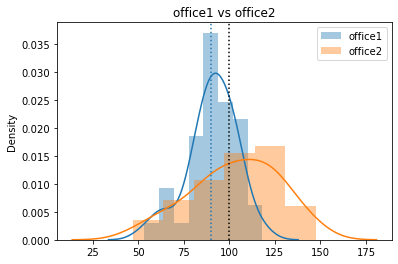

In [4]:
## class review used a normal distribution sampling
# two tailed, direction doesn't matter
# one sample or two sample?: two sample since we are comparing the two samples rather than 1 sample compared to the mean of the population as a whole
from turtle import color


H_0 = "The sales time on average are equal"
H_a = "The sales time on average are unequal"
alpha = .05

office1_sample = 40
office1_mean = 90
office1_std = 15

office2_sample = 50
office2_mean = 100
office2_std = 20

office1_dist = stats.norm(office1_mean,office1_std).rvs(office1_sample)
office2_dist = stats.norm(office2_mean,office2_std).rvs(office2_sample)

#graph it out
ax = sns.distplot(office1_dist,label="office1")
ax = sns.distplot(office2_dist,label="office2")
ax.legend()
ax.set_title("office1 vs office2")
ax.axvline(office1_mean,ls=":")
ax.axvline(office2_mean,ls=":",color="black")

#compare variances to know how to run the test
stat,pval = stats.levene(office1_dist,office2_dist)
stat,pval
if pval > 0.05:
    equal_var_flag = True
    print(f"we can accept that there are equal variance in these two groups with {round(pval,2)} certainty Flag=T",'stat=%.5f, p=%.5f' % (stat,pval))
else:
    equal_var_flag = False
    print(f"we can reject that there are equal variance in these two groups with {round((1-pval),2)} certainty Flag=F",'stat=%.5f, p=%.5f' % (stat,pval))


print('office1 mean=%.2f, office2 mean=%.2f' % (office1_dist.mean(),office1_dist.mean()))
t, p = stats.ttest_ind( office1_dist , office2_dist , equal_var = equal_var_flag )
print('t=%.5f, p=%.5f' % (t,p))
if p > alpha: #no directionality, use the full p
    print("We fail to reject the null hypothesis (", H_0,")")
#elif t < 0: # would pass if alternative mean was less than the null mean ##i don't think directionality really matters
    #print("We fail to reject the null hypothesis (", H0,")")
else:
     print("We reject the null Hypothesis (", H_0,")")


Load the mpg dataset and use it to answer the following questions:

In [5]:
mpg_df = data("mpg")
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


we can accept that there are equal variance in these two groups with 0.86 certainty Flag=T stat=0.03107, p=0.86023
1999 mean mpg=19.68, 2008 mean mpg=19.49
t=0.30120, p=0.76353
We fail to reject the null hypothesis ( 1999 mpg == 2008 mpg )


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


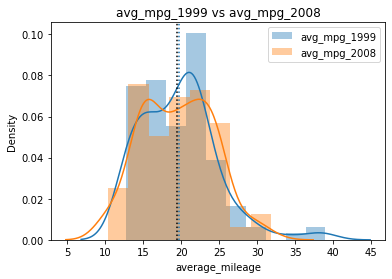

In [6]:
#Load the mpg dataset and use it to answer the following questions:

#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
H0 = "1999 mpg == 2008 mpg"
H1 = "1999 mpg != 2008 mpg"
mpg_df = data("mpg")
mpg_df["average_mileage"] = (2/((1/mpg_df.hwy) + (1/mpg_df.cty)))

avg_mpg_1999_series = (mpg_df[mpg_df["year"] == 1999]["average_mileage"])
avg_mpg_2008_series = (mpg_df[mpg_df["year"] == 2008]["average_mileage"])

alpha = .05

#compare variances to know how to run the test
stat,pval = stats.levene(avg_mpg_1999_series,avg_mpg_2008_series)
stat,pval
if pval > 0.05:
    equal_var_flag = True
    print(f"we can accept that there are equal variance in these two groups with {round(pval,2)} certainty Flag=T",'stat=%.5f, p=%.5f' % (stat,pval))
else:
    equal_var_flag = False
    print(f"we can reject that there are equal variance in these two groups with {round((1-pval),2)} certainty Flag=F",'stat=%.5f, p=%.5f' % (stat,pval))

#graph it out
ax = sns.distplot(avg_mpg_1999_series,label="avg_mpg_1999")
ax = sns.distplot(avg_mpg_2008_series,label="avg_mpg_2008")
ax.legend()
ax.set_title("avg_mpg_1999 vs avg_mpg_2008")
ax.axvline(avg_mpg_1999_series.mean(),ls=":")
ax.axvline(avg_mpg_2008_series.mean(),ls=":",color="black")

print('1999 mean mpg=%.2f, 2008 mean mpg=%.2f' % (avg_mpg_1999_series.mean(),avg_mpg_2008_series.mean()))

t, p = stats.ttest_ind( avg_mpg_1999_series , avg_mpg_2008_series , equal_var = equal_var_flag )
print('t=%.5f, p=%.5f' % (t,p))

if p > alpha: #no directionality, use the full p
    print("We fail to reject the null hypothesis (", H0,")")
#elif t < 0: # would pass if alternative mean was less than the null mean ##i don't think directionality really matters
    #print("We fail to reject the null hypothesis (", H0,")")
else: #p < alpha a
     print("We reject the null Hypothesis (", H0,")")


we can accept that there are equal variance in these two groups with 0.51 certainty Flag=T stat=0.43548, p=0.50997
1999 mean mpg=23.55, 2008 mean mpg=17.45
t=11.24643, p=0.00000
We reject the null Hypothesis ( compact mpg <= standard mpg )


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


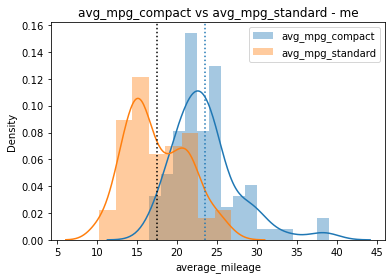

In [7]:
## i did this incorrectly in that i used compact vs non compact, refer to class version, and 2 sample test rather than 1 sample

#Are compact cars more fuel-efficient than the average car?
H0 = "compact mpg <= standard mpg"
H1 = "compact mpg > standard mpg"
mpg_df = data("mpg")
mpg_df["average_mileage"] = (2/((1/mpg_df.hwy) + (1/mpg_df.cty)))

avg_mpg_compact_series = (mpg_df[mpg_df["class"].isin(["compact","subcompact"])]["average_mileage"])
avg_mpg_standard_series = (mpg_df[~mpg_df["class"].isin(["compact","subcompact"])]["average_mileage"])

alpha = .05

#compare variances to know how to run the test
stat,pval = stats.levene(avg_mpg_compact_series,avg_mpg_standard_series)
if pval > 0.05:
    equal_var_flag = True
    print(f"we can accept that there are equal variance in these two groups with {round(pval,2)} certainty Flag=T",'stat=%.5f, p=%.5f' % (stat,pval))
else:
    equal_var_flag = False
    print(f"we can reject that there are equal variance in these two groups with {round((1-pval),2)} certainty Flag=F",'stat=%.5f, p=%.5f' % (stat,pval))

#graph it out
ax = sns.distplot(avg_mpg_compact_series,label="avg_mpg_compact")
ax = sns.distplot(avg_mpg_standard_series,label="avg_mpg_standard")
ax.legend()
ax.set_title("avg_mpg_compact vs avg_mpg_standard - me")
ax.axvline(avg_mpg_compact_series.mean(),ls=":")
ax.axvline(avg_mpg_standard_series.mean(),ls=":",color="black")


print('1999 mean mpg=%.2f, 2008 mean mpg=%.2f' % (avg_mpg_compact_series.mean(),avg_mpg_standard_series.mean()))

t, p = stats.ttest_ind( avg_mpg_compact_series , avg_mpg_standard_series , equal_var = equal_var_flag )
print('t=%.5f, p=%.5f' % (t,p))

if p/2 > alpha: #directionality, use the half p
    print("We fail to reject the null hypothesis (", H0,")")
elif t < 0: # would pass if alternative mean was less than the null mean
    print("We fail to reject the null hypothesis (", H0,")")
else: #p/2 < alpha and t > 0
     print("We reject the null Hypothesis (", H0,")")

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1999 mean mpg=23.55, 2008 mean mpg=19.59
t=8.58695, p=0.00000
We reject the null Hypothesis ( compact avg mpg <= all avg mpg )


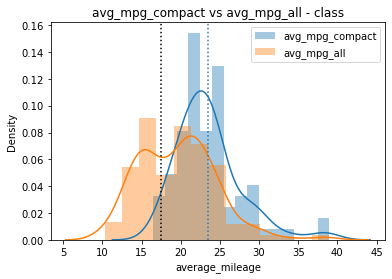

In [8]:
#class
#Are compact cars more fuel-efficient than the average car?

#p/2 compared to alpha due to 1 tail
#t stat should be positive if we feed in compact first

H0 = "compact avg mpg <= all avg mpg"
H1 = "compact avg mpg > all avg mpg"
mpg_df = data("mpg")
mpg_df["average_mileage"] = (2/((1/mpg_df.hwy) + (1/mpg_df.cty)))

avg_mpg_compact_series = (mpg_df[mpg_df["class"].isin(["compact","subcompact"])]["average_mileage"])
avg_mpg_all_series = (mpg_df["average_mileage"])
avg_mpg_all_series_mean = (mpg_df["average_mileage"]).mean()

alpha = .05

#graph it out
ax = sns.distplot(avg_mpg_compact_series,label="avg_mpg_compact")
ax = sns.distplot(avg_mpg_all_series,label="avg_mpg_all")
ax.legend()
ax.set_title("avg_mpg_compact vs avg_mpg_all - class")
ax.axvline(avg_mpg_compact_series.mean(),ls=":")
ax.axvline(avg_mpg_standard_series.mean(),ls=":",color="black")

print('1999 mean mpg=%.2f, 2008 mean mpg=%.2f' % (avg_mpg_compact_series.mean(),avg_mpg_all_series.mean()))

t, p = stats.ttest_1samp( avg_mpg_compact_series , avg_mpg_all_series_mean )
print('t=%.5f, p=%.5f' % (t,p))

if p/2 > alpha: #directionality, use the half p
    print("We fail to reject the null hypothesis (", H0,")")
elif t < 0: # would pass if alternative mean was less than the null mean
    print("We fail to reject the null hypothesis (", H0,")")
else: #p/2 < alpha and/or t > 0
     print("We reject the null Hypothesis (", H0,")")

we can accept that there are equal variance in these two groups with 0.91 certainty Flag=T stat=0.01390, p=0.90625
manual mean mpg=21.63, automatic mean mpg=18.58
t=4.65258, p=0.00001
We reject the null Hypothesis ( manual avg mpg <= automatic avg mpg )


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


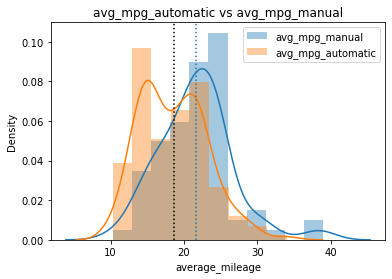

In [9]:
#Do manual cars get better gas mileage than automatic cars?
H0 = "manual avg mpg <= automatic avg mpg"
H1 = "manual avg mpg > automatic avg mpg"
mpg_df = data("mpg")
mpg_df["average_mileage"] = (2/((1/mpg_df.hwy) + (1/mpg_df.cty)))

avg_mpg_manual_series = (mpg_df[mpg_df["trans"].str.contains("manual")]["average_mileage"]) #using .str.contains()
avg_mpg_automatic_series = (mpg_df[~mpg_df["trans"].isin(["manual(m5)", "manual(m6)"])]["average_mileage"]) # using .isin[] and inversing with ~

alpha = .05

#compare variances to know how to run the test
stat,pval = stats.levene(avg_mpg_manual_series,avg_mpg_automatic_series)
if pval > 0.05:
    equal_var_flag = True
    print(f"we can accept that there are equal variance in these two groups with {round(pval,2)} certainty Flag=T",'stat=%.5f, p=%.5f' % (stat,pval))
else:
    equal_var_flag = False
    print(f"we can reject that there are equal variance in these two groups with {round((1-pval),2)} certainty Flag=F",'stat=%.5f, p=%.5f' % (stat,pval))

#graph it out
ax = sns.distplot(avg_mpg_manual_series,label="avg_mpg_manual")
ax = sns.distplot(avg_mpg_automatic_series,label="avg_mpg_automatic")
ax.legend()
ax.set_title("avg_mpg_automatic vs avg_mpg_manual")
ax.axvline(avg_mpg_manual_series.mean(),ls=":")
ax.axvline(avg_mpg_automatic_series.mean(),ls=":",color="black")



print('manual mean mpg=%.2f, automatic mean mpg=%.2f' % (avg_mpg_manual_series.mean(), avg_mpg_automatic_series.mean()))

t, p = stats.ttest_ind( avg_mpg_manual_series , avg_mpg_automatic_series , equal_var = equal_var_flag )
print('t=%.5f, p=%.5f' % (t,p))

if p/2 > alpha: #directionality (greater than)
    print("We fail to reject the null hypothesis (", H0,")")
elif t < 0: # would pass if alternative mean was less than the null mean
    print("We fail to reject the null hypothesis (", H0,")")
else: # p/2 < alpha and/or t > 0
     print("We reject the null Hypothesis (", H0,")")

-
-
-
-
-
-
-
-
-
-


In [10]:
telco_df = pd.read_csv("Cust_Churn_Telco.csv")
#telco_df.head()
#(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
#'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
#'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'])

corr_rate=0.248, p_val=0.00000
 since p0.0 is less than alpha we reject our null hypothesis 
	(tenure has no linear relationship with MonthlyCharges)


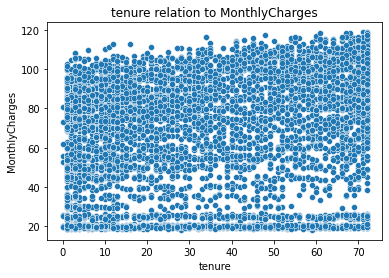

In [11]:
#Use the telco_churn data. Does tenure correlate with monthly charges? 

## The correlation coefficient, is a unitless continuous numerical measure between -1 and 1, where 1 = perfect correlation and -1 = perfect negative correlation.
corr_var1 = telco_df.tenure
corr_var2 = telco_df.MonthlyCharges

H0 = (f"{corr_var1.name} has no linear relationship with {corr_var2.name}")
H1 = (f"{corr_var1.name} has a linear relationship with {corr_var2.name}")

sns.scatterplot(data=telco_df,x=corr_var1,y=corr_var2).set(title=(f"{corr_var1.name} relation to {corr_var2.name}"))

corr_rate,p_val = stats.pearsonr(corr_var1,corr_var2)

if p_val < alpha:
    print('corr_rate=%.3f, p_val=%.5f\n' % (corr_rate,p_val), f"since p{round(p_val,5)} is less than alpha we reject our null hypothesis \n\t({H0})")
else:
    print('corr_rate=%.5f, p_val=%.5f\n' % (corr_rate,p_val), f"since p is greater than alpha we accept our null hypothesis \n\t({H0})")


In [12]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


between tenure and TotalCharges corr_rate=0.826, p_val=0.00000

between tenure and total charges; no phone, yes internet corr_rate=0.953, p_val=0.00000

between tenure and total charges; yes phone, no internet corr_rate=0.981, p_val=0.00000

between tenure and total charges; yes phone, yes internet corr_rate=0.958, p_val=0.00000

since p is less than alpha we reject our null hypothesis 
	(tenure has no linear relationship with TotalCharges)
Conclusion: there is a good correlation between services provided, and the total charges for tenure. There is a lack of Charges for fiber service with no phone, and no phone no internet


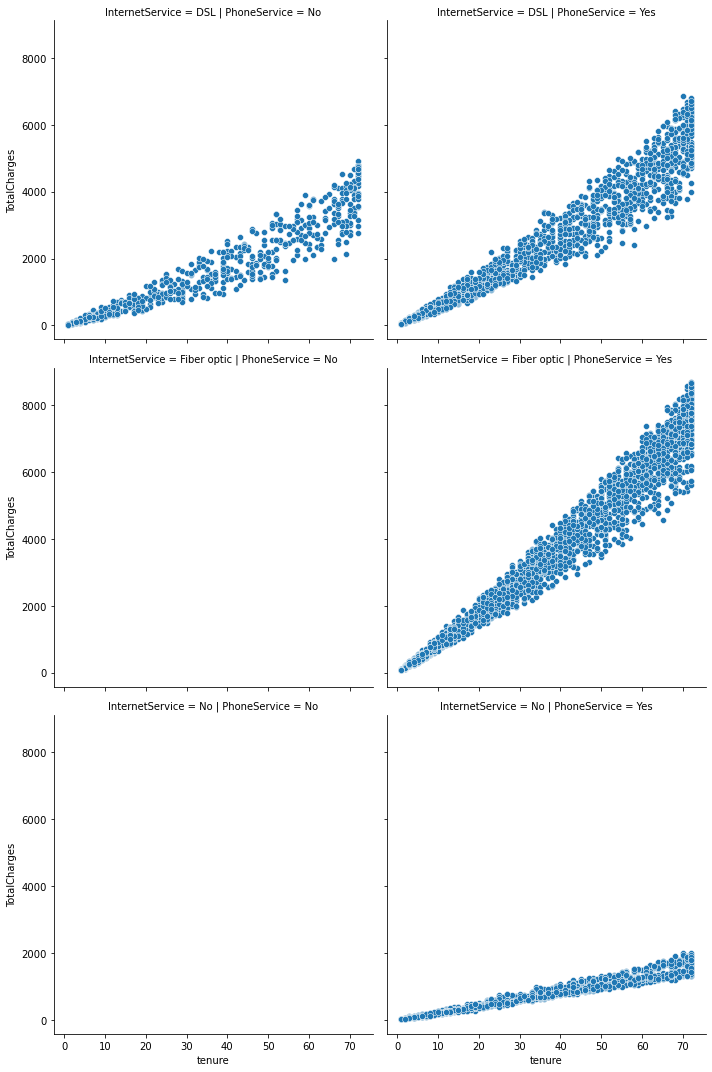

In [13]:
#Total charges?  What happens if you control for phone and internet service?

corr_var1 = telco_df[telco_df.TotalCharges.str.contains(" ") == False]["tenure"]   
corr_var2 = telco_df[telco_df.TotalCharges.str.contains(" ") == False]["TotalCharges"].astype(float)
corr_var1_noPhone_yesInternet = telco_df[telco_df.TotalCharges.str.contains(" ") == False]["tenure"][telco_df.PhoneService == "No"][telco_df.InternetService != "No"]
corr_var2_noPhone_yesInternet = telco_df[telco_df.TotalCharges.str.contains(" ") == False]["TotalCharges"][telco_df.PhoneService == "No"][telco_df.InternetService != "No"].astype(float)
corr_var1_yesPhone_noInternet = telco_df[telco_df.TotalCharges.str.contains(" ") == False]["tenure"][telco_df.PhoneService != "No"][telco_df.InternetService == "No"]
corr_var2_yesPhone_noInternet = telco_df[telco_df.TotalCharges.str.contains(" ") == False]["TotalCharges"][telco_df.PhoneService != "No"][telco_df.InternetService == "No"].astype(float)
corr_var1_yesPhone_yesInternet = telco_df[telco_df.TotalCharges.str.contains(" ") == False]["tenure"][telco_df.PhoneService != "No"][telco_df.InternetService != "No"]
corr_var2_yesPhone_yesInternet = telco_df[telco_df.TotalCharges.str.contains(" ") == False]["TotalCharges"][telco_df.PhoneService != "No"][telco_df.InternetService != "No"].astype(float)


H0 = (f"{corr_var1.name} has no linear relationship with {corr_var2.name}")
H1 = (f"{corr_var1.name} has a linear relationship with {corr_var2.name}")

sns.relplot(data=telco_df,x=corr_var1,y=corr_var2,row="InternetService",col="PhoneService")

corr_rate,p_val = stats.pearsonr(corr_var1,corr_var2)
print(f'between {corr_var1.name} and {corr_var2.name} corr_rate=%.3f, p_val=%.5f\n' % (corr_rate,p_val))

corr_rate_noPhone_yesInternet,p_val_noPhone_yesInternet = stats.pearsonr(corr_var1_noPhone_yesInternet,corr_var2_noPhone_yesInternet)
print(f'between tenure and total charges; no phone, yes internet corr_rate=%.3f, p_val=%.5f\n' % (corr_rate_noPhone_yesInternet,p_val_noPhone_yesInternet))

corr_rate_yesPhone_noInternet,p_val_yesPhone_noInternet = stats.pearsonr(corr_var1_yesPhone_noInternet,corr_var2_yesPhone_noInternet)
print(f'between tenure and total charges; yes phone, no internet corr_rate=%.3f, p_val=%.5f\n' % (corr_rate_yesPhone_noInternet,p_val_yesPhone_noInternet))

corr_rate_yesPhone_yesInternet,p_val_yesPhone_yesInternet = stats.pearsonr(corr_var1_yesPhone_yesInternet,corr_var2_yesPhone_yesInternet)
print(f'between tenure and total charges; yes phone, yes internet corr_rate=%.3f, p_val=%.5f\n' % (corr_rate_yesPhone_yesInternet,p_val_yesPhone_yesInternet))

if p_val < alpha:
    print(f"since p is less than alpha we reject our null hypothesis \n\t({H0})")
else:
    print(f"since p is greater than alpha we accept our null hypothesis \n\t({H0})")

print("Conclusion: there is a good correlation between services provided, and the total charges for tenure. \
There is a lack of Charges for fiber service with no phone, and no phone no internet")


-
-
-
-
-
-
-
-
-
-
-
-
-
-


Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [14]:
from datetime import date
employees_df = pd.read_csv("employees.csv")
titles_df = pd.read_csv("titles.csv")
salaries_df = pd.read_csv("salaries.csv")
emp_sal_df = pd.merge(employees_df,salaries_df,on="emp_no",how="inner")
emp_sal_df = emp_sal_df[emp_sal_df["salary_till"].str.contains("9999")]
emp_sal_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,salary_from,salary_till
16,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
22,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
29,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
45,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
58,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


corr_rate=0.306, p_val=0.00000
 since p0.0 is less than alpha we reject our null hypothesis 
	(tenure_years has no linear relationship with salary)
Conclusion: yes with correlation rate of 0.306


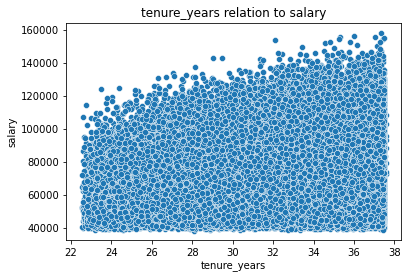

In [15]:
#Is there a relationship between how long an employee has been with the company and their salary?
emp_sal_df["tenure_years"] = ((pd.Timestamp.now().normalize() - pd.to_datetime(emp_sal_df["hire_date"]))/np.timedelta64(1,"Y"))

corr_var1 = emp_sal_df.tenure_years
corr_var2 = emp_sal_df.salary

H0 = (f"{corr_var1.name} has no linear relationship with {corr_var2.name}")
H1 = (f"{corr_var1.name} has a linear relationship with {corr_var2.name}")

sns.scatterplot(data=emp_sal_df,x=corr_var1,y=corr_var2).set(title=(f"{corr_var1.name} relation to {corr_var2.name}"))

corr_rate,p_val = stats.pearsonr(corr_var1,corr_var2)

if p_val < alpha:
    print('corr_rate=%.3f, p_val=%.5f\n' % (corr_rate,p_val), f"since p{round(p_val,5)} is less than alpha we reject our null hypothesis \n\t({H0})")
else:
    print('corr_rate=%.5f, p_val=%.5f\n' % (corr_rate,p_val), f"since p is greater than alpha we accept our null hypothesis \n\t({H0})")

print(f"Conclusion: yes with correlation rate of {round(corr_rate,3)}")

corr_rate=0.287, p_val=0.00000
 since p0.0 is less than alpha we reject our null hypothesis 
	(title_count has no linear relationship with tenure_years)
Conclusion: yes with correlation rate of 0.287


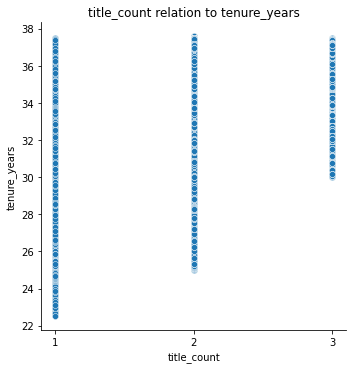

In [16]:
#Is there a relationship between how long an employee has been with the company and the number of titles they have had?

emp_titl_df = pd.merge(emp_sal_df,titles_df,on="emp_no",how="inner")
emp_titl_df.groupby("emp_no").count()
emp_titles_df = pd.merge(emp_titl_df,emp_titl_df.groupby("emp_no").count().iloc[:,1],on="emp_no",how="inner")
emp_titles_df.rename(columns={"first_name_y":"title_count"},inplace=True)

corr_var1 = emp_titles_df.title_count
corr_var2 = emp_titles_df.tenure_years

H0 = (f"{corr_var1.name} has no linear relationship with {corr_var2.name}")
H1 = (f"{corr_var1.name} has a linear relationship with {corr_var2.name}")

sns.relplot(data=emp_titles_df,x=corr_var1.astype(str),y=corr_var2).set(title=(f"{corr_var1.name} relation to {corr_var2.name}"))


corr_rate,p_val = stats.pearsonr(corr_var1,corr_var2)

if p_val < alpha:
    print('corr_rate=%.3f, p_val=%.5f\n' % (corr_rate,p_val), f"since p{round(p_val,5)} is less than alpha we reject our null hypothesis \n\t({H0})")
else:
    print('corr_rate=%.5f, p_val=%.5f\n' % (corr_rate,p_val), f"since p is greater than alpha we accept our null hypothesis \n\t({H0})")

print(f"Conclusion: yes with correlation rate of {round(corr_rate,3)}")

-
-
-
-
-
-
-
-
-
-
-
-
-

corr_rate=0.535, p_val=0.00000
 since p is less than alpha we reject our null hypothesis 
	(Reaction has no linear relationship with Days)


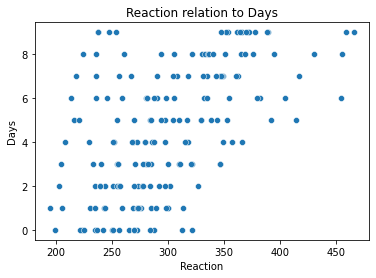

In [17]:
#Use the sleepstudy data. 
sleep_df = data("sleepstudy")
sleep_df.Subject = ((sleep_df.Subject.astype(str) + " subject"))

#Is there a relationship between days and reaction time?

corr_var1 = sleep_df["Reaction"]
corr_var2 = sleep_df["Days"]

H0 = (f"{corr_var1.name} has no linear relationship with {corr_var2.name}")
H1 = (f"{corr_var1.name} has a linear relationship with {corr_var2.name}")

sns.scatterplot(data=sleep_df,x=corr_var1,y=corr_var2).set(title=(f"{corr_var1.name} relation to {corr_var2.name}"))

corr_rate,p_val = stats.pearsonr(corr_var1,corr_var2)

if p_val < alpha:
    print('corr_rate=%.3f, p_val=%.5f\n' % (corr_rate,p_val), f"since p is less than alpha we reject our null hypothesis \n\t({H0})")
else:
    print('corr_rate=%.5f, p_val=%.5f\n' % (corr_rate,p_val), f"since p is greater than alpha we accept our null hypothesis \n\t({H0})")


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 				Codeup Student	Not Codeup Student
Uses a Macbook			49			20
Doesn't Use A Macbook	1			30

In [18]:
alpha = .05

df1 = pd.DataFrame(
                [[49,20],[1,30]],
                index=["Uses a Macbook","Doesnt Use a Macbook"],
                columns=["codeup_student","not_codeup_student"]
                )
chi2, p, degf, expected = stats.chi2_contingency(df1)

H0 = (f"{df2.index.name} is independant of being {df2.columns.name}")
H1 = (f"{df2.index.name} is not independant of being {df2.columns.name}")

print('Observed')
print(df1.values)
print('---\nExpected')
print(expected)
print(f'---\nchi^2 = {chi2:.4f}, p = {p:.5f}, degf = {degf}')
if p>alpha:
    print(f"due to p={p:.5f} > α={alpha} we fail to reject our null hypothesis")
else:
    print(f"due to p = {p:.5f} < α = {alpha} we reject our null hypothesis\n({H0})")


Observed
[[49 20]
 [ 1 30]]
---
Expected
[[34.5 34.5]
 [15.5 15.5]]
---
chi^2 = 36.6526, p = 0.00000, degf = 1
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(Uses a Macbook is independant of being codeup_student)


Choose another 2 categorical variables from the mpg dataset and perform a 
chi^2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [52]:
mpg_df["transmission"] = np.where((mpg_df["trans"].str.contains("manual")),"manual","automatic")
df1 = pd.crosstab(mpg_df.transmission,mpg_df.year)
print(df1)
chi2, p, degf, expected = stats.chi2_contingency(df1)

H0 = (f"{df2.index.name} is independant of being {df2.columns.name}")
H1 = (f"{df2.index.name} is not independant of being {df2.columns.name}")

print('Observed')
print(df1.values)
print('---\nExpected')
print(expected)
print(f'---\nchi^2 = {chi2:.4f}, p = {p:.5f}, degf = {degf}')
if p>alpha:
    print(f"due to p={p:.5f} > α={alpha} we fail to reject our null hypothesis\n({H0})")
else:
    print(f"due to p = {p:.5f} < α = {alpha} we reject our null hypothesis\n({H0})")

year          1999  2008
transmission            
automatic       74    83
manual          43    34
Observed
[[74 83]
 [43 34]]
---
Expected
[[78.5 78.5]
 [38.5 38.5]]
---
chi^2 = 1.2388, p = 0.26570, degf = 1
due to p=0.26570 > α=0.05 we fail to reject our null hypothesis
(automatic is independant of being 1999)


In [47]:
deptno_df = pd.read_csv("dept_emp.csv")
departments_df = pd.read_csv("departments.csv")
dept_mang_df = pd.read_csv("dept_manager.csv")
dept_df = pd.merge(deptno_df,departments_df,left_on="dept_employed",right_on="dept_no",how="left")
dept_emp_df = pd.merge(dept_df,employees_df,on="emp_no",how="left")
salaries_df = salaries_df[salaries_df["salary_till"].str.contains("9999")]
dept_emp_df = pd.merge(dept_emp_df,salaries_df,on="emp_no",how="right")
dept_emp_df


,emp_no,dept_employed,in_dept_from,in_dept_till,dept_no,dept_name,birth_date,first_name,last_name,gender,hire_date,salary,salary_from,salary_till
0,10001,d005,1986-06-26,9999-01-01,d005,Development,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,d007,1996-08-03,9999-01-01,d007,Sales,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,d004,1995-12-03,9999-01-01,d004,Production,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,d004,1986-12-01,9999-01-01,d004,Production,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,d003,1989-09-12,9999-01-01,d003,Human Resources,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265327,499995,d004,1997-06-02,9999-01-01,d004,Production,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
265328,499996,d004,1996-05-13,9999-01-01,d004,Production,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
265329,499997,d005,1987-08-30,9999-01-01,d005,Development,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
265330,499998,d002,1993-12-27,9999-01-01,d002,Finance,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [70]:
df2 = pd.crosstab(dept_emp_df.gender,dept_emp_df[dept_emp_df["dept_name"].isin(["Sales","Marketing"])]["dept_name"])
chi2, p, degf, expected = stats.chi2_contingency(df2)

H0 = (f"{df2.index.name} is independant of being {df2.columns.name}")
H1 = (f"{df2.index.name} is not independant of being {df2.columns.name}")

print('Observed')
print(df2.values)
print('---\nExpected')
print(expected)
print(f'---\nchi^2 = {chi2:.4f}, p = {p:.5f}, degf = {degf}')
if p>alpha:
    print(f"due to p={p:.5f} > α={alpha} we fail to reject our null hypothesis\n({H0})")
else:
    print(f"due to p = {p:.5f} < α = {alpha} we reject our null hypothesis\n({H0})")


Observed
[[ 6429 16698]
 [ 9823 25302]]
---
Expected
[[ 6452.31071895 16674.68928105]
 [ 9799.68928105 25325.31071895]]
---
chi^2 = 0.1855, p = 0.66670, degf = 1
due to p=0.66670 > α=0.05 we fail to reject our null hypothesis
(gender is independant of being dept_name)
